#### Refer for [basics](https://alefram.github.io/posts/Basic-inverse-kinematics-in-Mujoco) and [exact](https://www.kwesirutledge.info/thoughts/mujoco2)

In [1]:
import numpy as np
import mujoco
import mujoco.viewer as viewer
import mediapy as media
import collections

from absl import logging
from dm_control.mujoco.wrapper import mjbindings
import numpy as np

from dm_control import mujoco as dm_mujoco
from dm_control.utils import inverse_kinematics as ik


In [2]:
!ls trs_so_arm100

assets	LICENSE  README.md  scene.xml  so_arm100.png  so_arm100.xml


In [3]:
xml = "trs_so_arm100/scene.xml"
model = mujoco.MjModel.from_xml_path(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)


In [4]:
camera = mujoco.MjvCamera()
mujoco.mjv_defaultFreeCamera(model, camera)
camera.distance = 0.7


In [5]:
_TOL = 1.2e-14
_MAX_STEPS = 100


In [6]:
xml_ph = 'trs_so_arm100/so_arm100.xml'
with open(xml_ph) as f: xml_ph_s = f.read()
physics = dm_mujoco.Physics.from_xml_string(xml_ph_s)

In [11]:
site_name = 'attachment_site'
joint_names = ['Rotation', 'Pitch', 'Elbow', 'Wrist_Pitch', 'Wrist_Roll', 'Jaw']

Target => [-0.27624525  0.19330623  0.16753375]
Results
initial point => [-1.27801257e-07 -4.07770729e-01  1.16398639e-01]
Desire point => [-0.27624525  0.19330623  0.16753375] 



Initial position,Desire end effector position

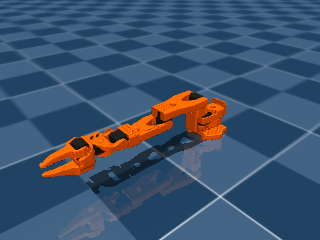
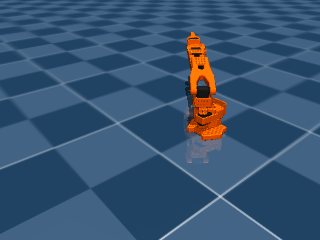

In [12]:
target_pos = (-0.45, 0.35, 0.2)
result = ik.qpos_from_site_pose(
    physics=physics,
    site_name=site_name,
    target_pos=target_pos,
    joint_names=joint_names,
    tol=_TOL,
    max_steps=_MAX_STEPS,
    inplace=True)
data.qpos = result[0].tolist()
#Initial joint position
qpos0 = data.qpos.copy()

#Step the simulation.
mujoco.mj_forward(model, data)

#Use the last piece as an "end effector" to get a test point in cartesian 
# coordinates
target = data.body('Moving_Jaw').xpos
print("Target =>",target)

#Plot results
print("Results")
mujoco.mj_resetDataKeyframe(model, data, 1)
mujoco.mj_forward(model, data)
init_point = data.body('Moving_Jaw').xpos.copy()
renderer.update_scene(data, camera)
target_plot = renderer.render()

data.qpos = qpos0
mujoco.mj_forward(model, data)
result_point = data.body('Moving_Jaw').xpos.copy()
renderer.update_scene(data, camera)
result_plot = renderer.render()

print("initial point =>", init_point)
print("Desire point =>", result_point, "\n")

images = {
    'Initial position': target_plot,
    ' Desire end effector position': result_plot,
}

media.show_images(images)